In [163]:
import pandas as pd
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
from optbinning import BinningProcess
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_auc_score
from tools import Evaluate
from sklearn.metrics import confusion_matrix

# Load data

In [62]:
#Load the training data set
df_train = pd.read_csv('D:\My stuff\School\Master\Master Thesis\Data\Train data\GiveMeSomeCredit_main.csv')

In [63]:
#Check shape
df_train.shape

(96214, 9)

In [64]:
#Check summary
df_train.describe()

,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberRealEstateLoansOrLines,Age,NumberOfOpenCreditLinesAndLoans,RevolvingUtilizationOfUnsecuredLines,NumberOfDependents,MonthlyIncome,Target
count,96214.000000,96214.000000,96214.000000,96214.000000,96214.000000,96214.000000,96214.000000,9.621400e+04,96214.000000
mean,0.382761,26.796641,1.053880,51.316804,8.757385,6.163583,0.853202,6.676254e+03,0.069522
std,3.508071,451.608009,1.152009,14.431786,5.171349,274.043224,1.148566,1.519509e+04,0.254341
min,0.000000,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,0.000000,0.143884,0.000000,41.000000,5.000000,0.034931,0.000000,3.400000e+03,0.000000
50%,0.000000,0.296021,1.000000,51.000000,8.000000,0.176526,0.000000,5.400000e+03,0.000000
75%,0.000000,0.482558,2.000000,62.000000,11.000000,0.578273,2.000000,8.220000e+03,0.000000
max,98.000000,61106.500000,54.000000,103.000000,58.000000,50708.000000,20.000000,3.008750e+06,1.000000


In [65]:
#Load test data
df_test = pd.read_csv('D:\My stuff\School\Master\Master Thesis\Data\Test data\GiveMeSomeCredit_main.csv')

In [66]:
#Specify independent and dependent variables
indep_vars = df_train.columns.to_list()
indep_vars.remove('Target')

# Raw model

## Check normality

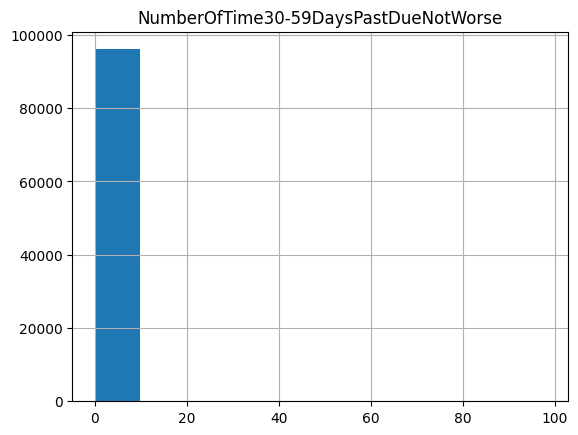

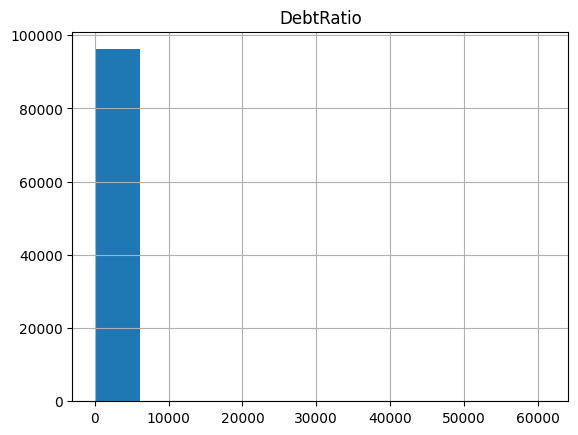

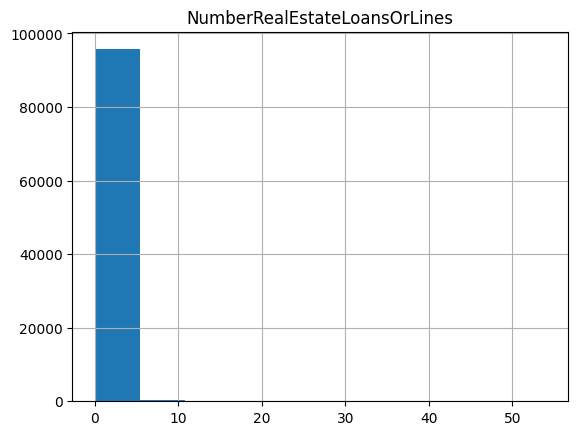

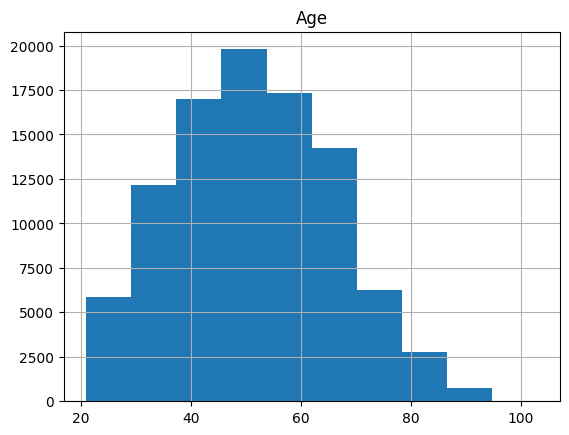

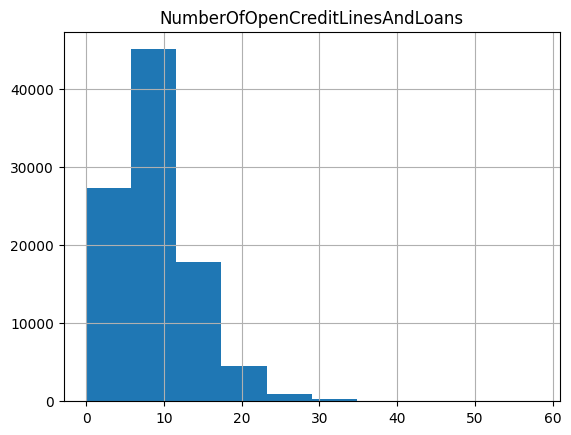

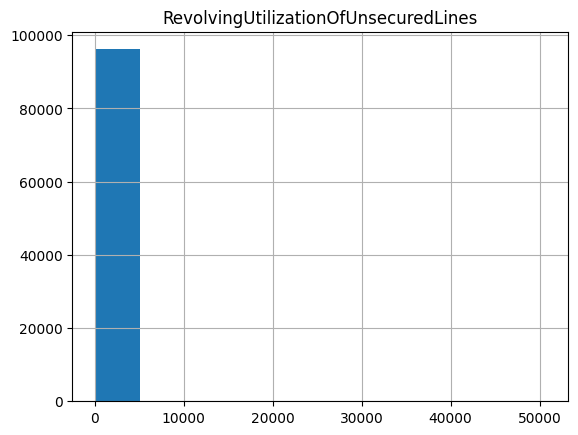

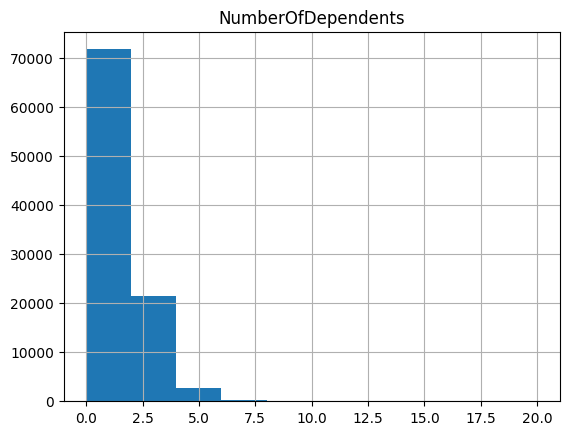

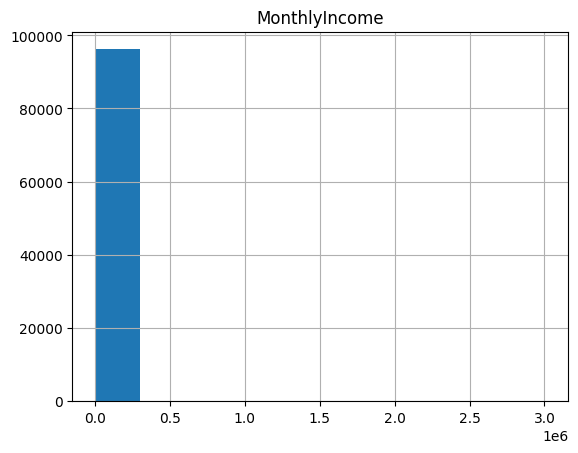

In [67]:
#Check normality
for i in range(df_train.shape[1] - 1):
    df_train.iloc[:, i].hist()
    plt.title(df_train.columns[i])
    plt.show()

In [68]:
#Trim outliers
df_train_trimmed = df_train.copy()
for i in range(df_train_trimmed.shape[1] - 1):
    df_train_trimmed = df_train_trimmed.loc[(df_train.iloc[:, i] <= np.percentile(df_train.iloc[:, i], 99)) & (df_train.iloc[:, i] >= np.percentile(df_train.iloc[:, i], 1)), :]

In [69]:
#Check shape
df_train_trimmed.shape

(88774, 9)

In [70]:
#Check summary
df_train_trimmed.describe()

,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberRealEstateLoansOrLines,Age,NumberOfOpenCreditLinesAndLoans,RevolvingUtilizationOfUnsecuredLines,NumberOfDependents,MonthlyIncome,Target
count,88774.000000,88774.000000,88774.000000,88774.000000,88774.000000,88774.000000,88774.000000,88774.000000,88774.000000
mean,0.233999,1.828331,1.025233,51.375696,8.675198,0.316458,0.821536,6255.758544,0.062473
std,0.617103,23.323601,0.979953,13.968524,4.671313,0.337810,1.076379,3891.796904,0.242014
min,0.000000,0.000000,0.000000,24.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.152015,0.000000,41.000000,5.000000,0.033866,0.000000,3500.000000,0.000000
50%,0.000000,0.298352,1.000000,51.000000,8.000000,0.166915,0.000000,5416.000000,0.000000
75%,0.000000,0.476507,2.000000,62.000000,11.000000,0.542964,1.000000,8160.000000,0.000000
max,4.000000,639.500000,5.000000,86.000000,25.000000,1.091514,4.000000,25000.000000,1.000000


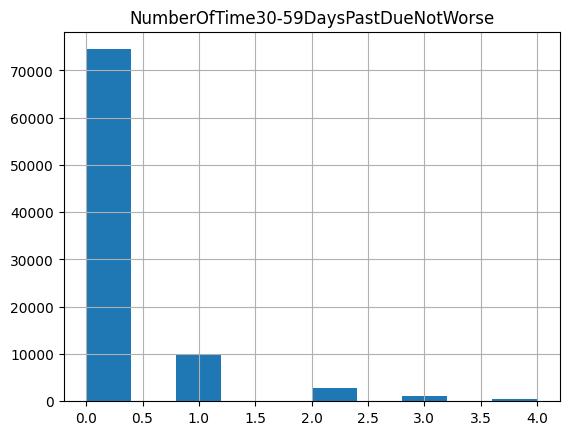

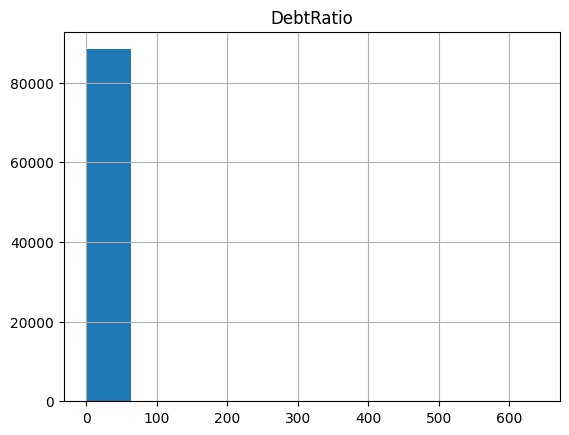

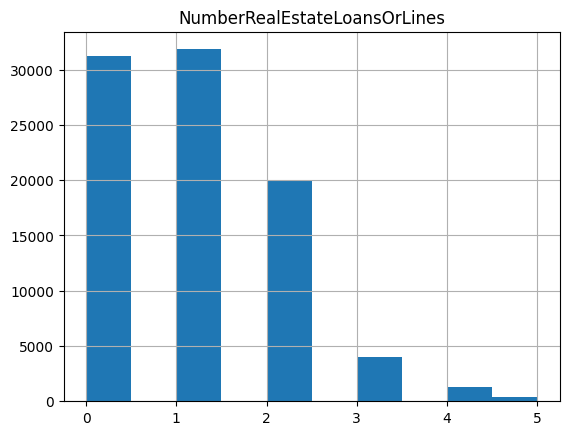

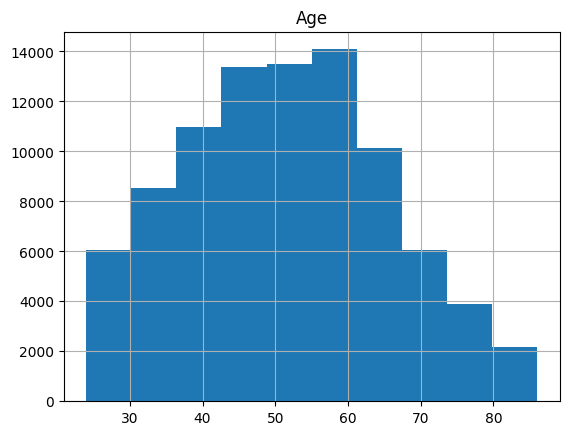

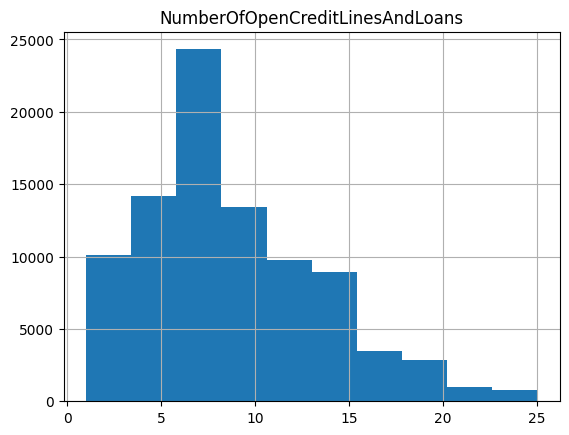

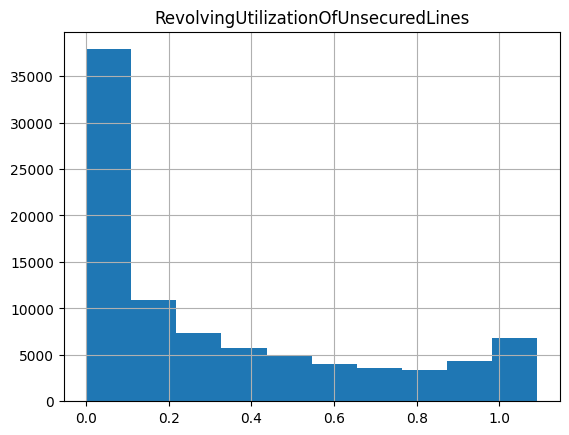

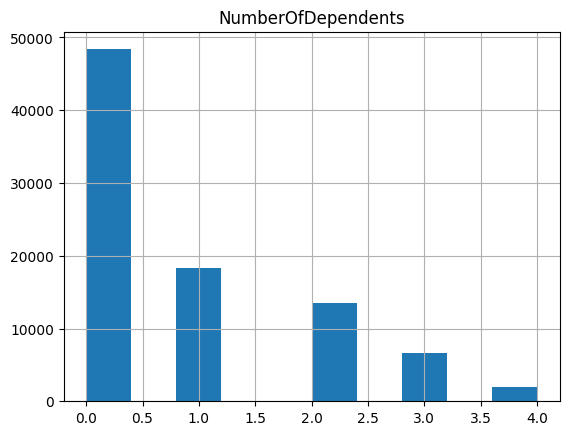

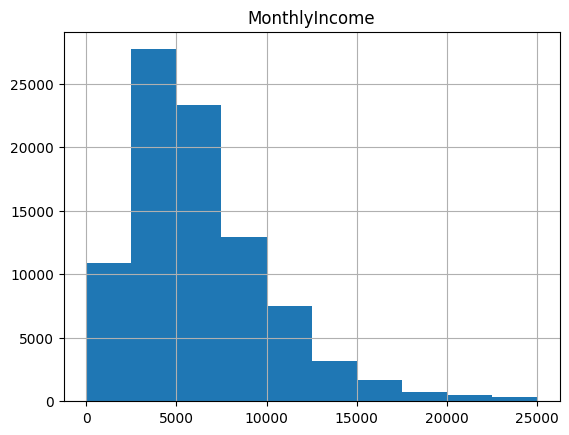

In [71]:
#Check normality after removing outliers
for i in range(df_train_trimmed.shape[1] - 1):
    df_train_trimmed.iloc[:, i].hist()
    plt.title(df_train_trimmed.columns[i])
    plt.show()

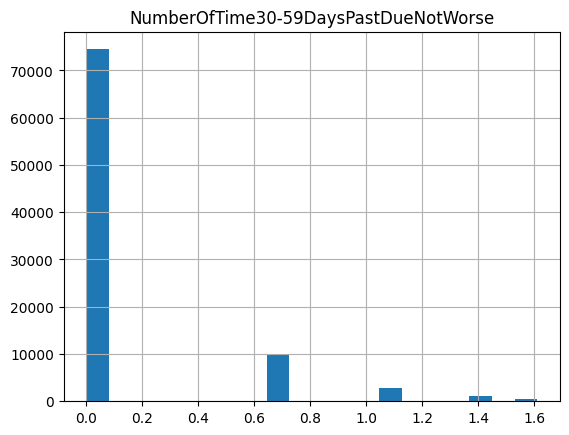

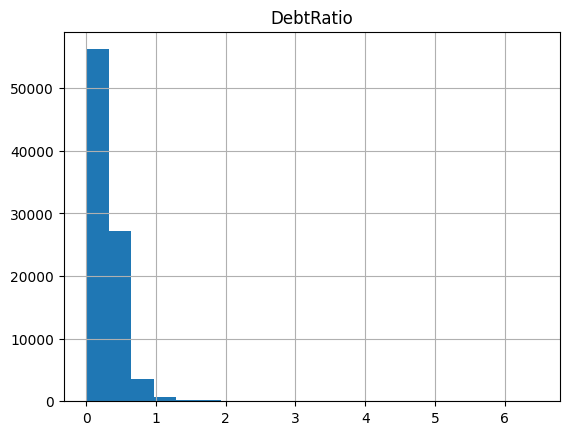

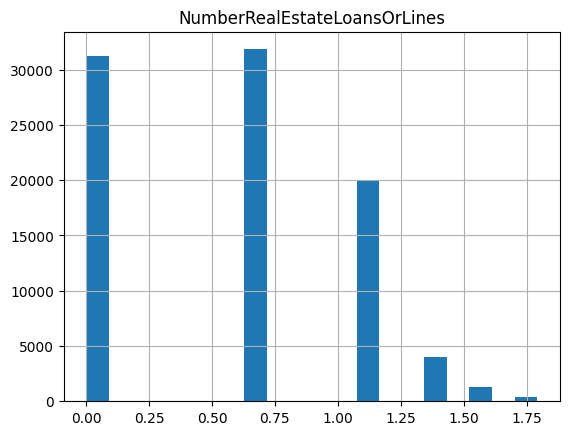

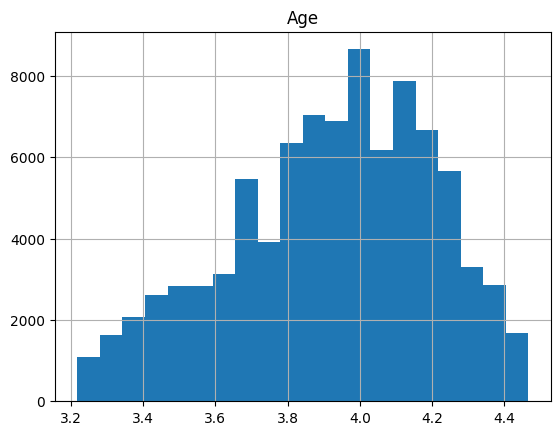

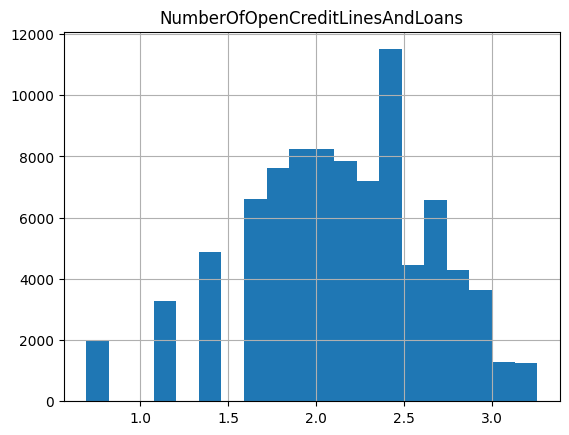

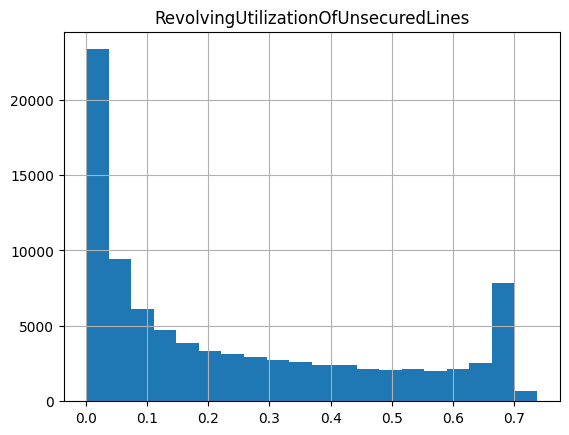

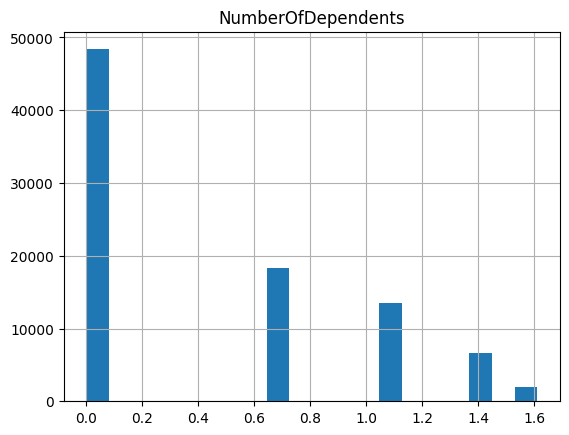

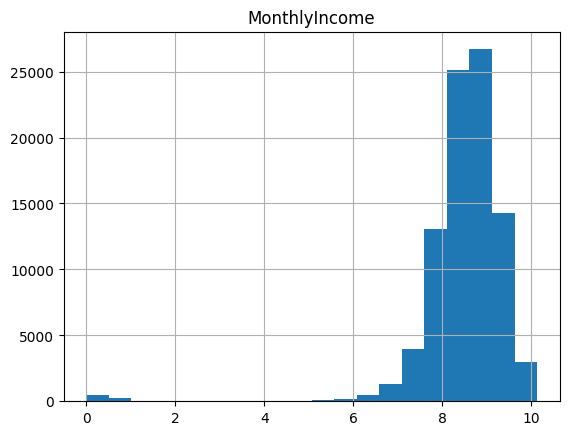

In [72]:
#Check logarithmized normality
for i in range(df_train_trimmed.shape[1] - 1):
    np.log(df_train_trimmed.iloc[:, i] + 1).hist(bins = 20)
    plt.title(df_train_trimmed.columns[i])
    plt.show()

In [73]:
#Logarithmization
df_train_trimmed['DebtRatio'] = np.log(df_train_trimmed['DebtRatio'] + 1)
df_train_trimmed['MonthlyIncome'] = np.log(df_train_trimmed['MonthlyIncome'] + 1)

## Feature selection

In [148]:
#Feature selection
feat_sel = SequentialFeatureSelector(LogisticRegression(penalty = None, random_state = 42, n_jobs = -1), direction = 'forward', scoring = 'roc_auc', tol = 0.001, n_jobs = -1, n_features_to_select = 'auto')
feat_sel.fit(df_train_trimmed.loc[:, indep_vars], df_train_trimmed['Target'])

SequentialFeatureSelector(estimator=LogisticRegression(n_jobs=-1, penalty=None,
                                                       random_state=42),
                          n_features_to_select='auto', n_jobs=-1,
                          scoring='roc_auc', tol=0.001)

In [162]:
#Show selected features
feat_sel.feature_names_in_

array(['NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'NumberRealEstateLoansOrLines', 'Age',
       'NumberOfOpenCreditLinesAndLoans',
       'RevolvingUtilizationOfUnsecuredLines', 'NumberOfDependents',
       'MonthlyIncome'], dtype=object)

## Logistic regression

In [149]:
#Logistic regression
log_reg_raw = LogisticRegression(penalty = None, random_state = 42, n_jobs = -1)
log_reg_raw.fit(feat_sel.transform(df_train_trimmed.loc[:, indep_vars]), df_train_trimmed['Target'])

LogisticRegression(n_jobs=-1, penalty=None, random_state=42)

## Evaluate

In [150]:
#Get predictions
preds_raw = log_reg_raw.predict_proba(feat_sel.transform(df_test.loc[:, indep_vars]))[:, 1]

In [151]:
#Calculate AUC
roc_auc_score(df_test['Target'], preds_raw) #0.8078788510333518

0.8127097491130655

# Binned model

## Binning

In [152]:
#Perform binning
binning = BinningProcess(indep_vars, n_jobs = -1, binning_fit_params = {i:{'monotonic_trend': 'auto_asc_desc'} for i in indep_vars}, max_pvalue = 0.1)
binning.fit(df_train.loc[:, indep_vars], df_train['Target'])

BinningProcess(binning_fit_params={'Age': {'monotonic_trend': 'auto_asc_desc'},
                                   'DebtRatio': {'monotonic_trend': 'auto_asc_desc'},
                                   'MonthlyIncome': {'monotonic_trend': 'auto_asc_desc'},
                                   'NumberOfDependents': {'monotonic_trend': 'auto_asc_desc'},
                                   'NumberOfOpenCreditLinesAndLoans': {'monotonic_trend': 'auto_asc_desc'},
                                   'NumberOfTime30-59DaysPastDueNotWorse': {'monot...
                                   'NumberRealEstateLoansOrLines': {'monotonic_trend': 'auto_asc_desc'},
                                   'RevolvingUtilizationOfUnsecuredLines': {'monotonic_trend': 'auto_asc_desc'}},
               max_pvalue=0.1, n_jobs=-1,
               variable_names=['NumberOfTime30-59DaysPastDueNotWorse',
                               'DebtRatio', 'NumberRealEstateLoansOrLines',
                               'Age', 'NumberOfOpenCreditLinesAndLoans',
                               'RevolvingUtilizationOfUnsecuredLines',
                               'NumberOfDependents', 'MonthlyIncome'])

In [153]:
#Show summary of binned variables
binning.summary().sort_values('iv', ascending = False)

,name,dtype,status,selected,n_bins,iv,js,gini,quality_score
5,RevolvingUtilizationOfUnsecuredLines,numerical,OPTIMAL,True,9,1.012537,0.11886,0.531812,0.134384
0,NumberOfTime30-59DaysPastDueNotWorse,numerical,OPTIMAL,True,3,0.713952,0.082479,0.374178,0.213915
3,Age,numerical,OPTIMAL,True,9,0.202483,0.024651,0.234352,0.598745
7,MonthlyIncome,numerical,OPTIMAL,True,6,0.084059,0.01044,0.159267,0.301167
1,DebtRatio,numerical,OPTIMAL,True,5,0.073936,0.009179,0.138742,0.214431
4,NumberOfOpenCreditLinesAndLoans,numerical,OPTIMAL,True,4,0.060395,0.007428,0.097988,0.134469
2,NumberRealEstateLoansOrLines,numerical,OPTIMAL,True,2,0.035451,0.004424,0.092077,0.09041
6,NumberOfDependents,numerical,OPTIMAL,True,4,0.031016,0.003869,0.093696,0.095579


In [154]:
#Transform
df_train_binned = binning.transform(df_train.loc[:, indep_vars], metric = 'woe')
#df_train_binned = df_train_binned.loc[:, ['RevolvingUtilizationOfUnsecuredLines', 'NumberOfTime30-59DaysPastDueNotWorse']]

## Feature selection

In [155]:
#Feature selection
feat_sel_binned = SequentialFeatureSelector(LogisticRegression(penalty = None, random_state = 42, n_jobs = -1), direction = 'forward', scoring = 'roc_auc', tol = 0.001, n_jobs = -1, n_features_to_select = 'auto')
feat_sel_binned.fit(df_train_binned, df_train['Target'])

SequentialFeatureSelector(estimator=LogisticRegression(n_jobs=-1, penalty=None,
                                                       random_state=42),
                          n_features_to_select='auto', n_jobs=-1,
                          scoring='roc_auc', tol=0.001)

In [156]:
#Check selected features
feat_sel_binned.feature_names_in_

array(['NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'NumberRealEstateLoansOrLines', 'Age',
       'NumberOfOpenCreditLinesAndLoans',
       'RevolvingUtilizationOfUnsecuredLines', 'NumberOfDependents',
       'MonthlyIncome'], dtype=object)

# Logistic regression

In [157]:
#Logistic regression
log_reg_binned = LogisticRegression(penalty = None, random_state = 42, n_jobs = -1)
log_reg_binned.fit(feat_sel_binned.transform(df_train_binned), df_train['Target'])

LogisticRegression(n_jobs=-1, penalty=None, random_state=42)

## Evaluate

In [158]:
#Get predictions
preds_binned = log_reg_binned.predict_proba(feat_sel_binned.transform(binning.transform(df_test.loc[:, indep_vars])))[:, 1]

In [159]:
#Calculate AUC
roc_auc_score(df_test['Target'], preds_binned) #0.8078788510333518

0.814856557530711

# Complete evaluation

In [160]:
#Get main results
res_raw = Evaluate(df_test['Target'], preds_raw, df_train_trimmed['Target'].mean())
res_binned = Evaluate(df_test['Target'], preds_binned, df_train['Target'].mean())

In [195]:
#Show results
final_res = pd.DataFrame([res_raw.results, res_binned.results], index  = ['Raw', 'Binned'])
final_res

,AUC,F2-score,Brier score,KS statistic,Partial GINI Index,H-measure
Raw,0.812710,0.327789,0.057883,0.488325,0.581517,0.316294
Binned,0.814857,0.337045,0.056247,0.492085,0.585432,0.314663


In [186]:
#Perform permutation tests
perm_tests = res_raw.permutation_test(preds_binned)

In [196]:
#Prepare for export
final_res = final_res.append(perm_tests, ignore_index = True)
final_res = final_res.round(3)
final_res.index = ['raw', 'binned', 'p']

C:\Users\matya\AppData\Local\Temp\ipykernel_6616\3510341676.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_res = final_res.append(perm_tests, ignore_index = True)


In [199]:
#Export to latex
final_res.to_latex('Run 202307202046 main/qualitative_res_latex.txt', index = True, na_rep = '', caption = 'Results - qualitative analysis', label = 'tab:resqual', position = '!htbp', escape = False)

C:\Users\matya\AppData\Local\Temp\ipykernel_6616\3536050537.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  final_res.to_latex('Run 202307202046 main/qualitative_res_latex.txt', index = True, na_rep = '', caption = 'Results - qualitative analysis', label = 'tab:resqual', position = '!htbp', escape = False)
